In [121]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
data['Datetime'] = data['Datetime'].apply(lambda x: pd.to_datetime(x[:10], format='%d-%m-%Y'))
data.index = data.Datetime
data.drop(['Datetime','ID'],axis=1,inplace=True)
daliy_data = data.resample('D').sum()

In [126]:
daliy_data['ds'] = daliy_data.index
daliy_data['y'] = daliy_data['Count']
daliy_data.drop(['Count'],axis=1,inplace=True)

In [127]:
daliy_data.head()

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds          yhat    yhat_lower    yhat_upper
970 2015-04-22  16548.388967  15255.596157  17880.245206
971 2015-04-23  16343.037613  15029.118077  17655.749259
972 2015-04-24  16125.328240  14834.359428  17275.830381
973 2015-04-25  14957.500467  13615.533211  16207.226634
974 2015-04-26  14788.112282  13502.846948  16007.650909


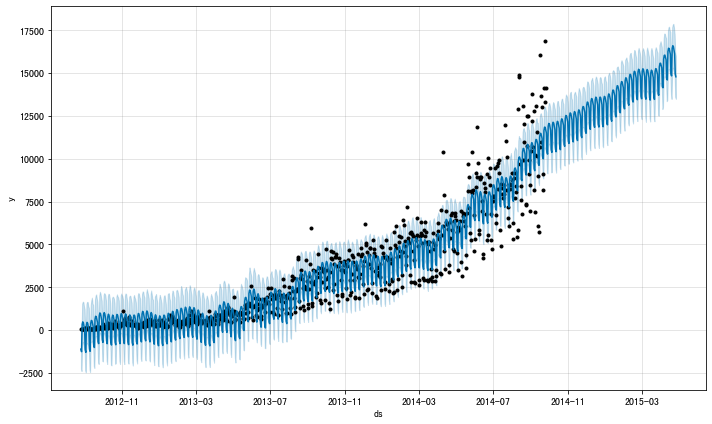

In [144]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
model.fit(daliy_data)
future = model.make_future_dataframe(periods=213)
# 预测数据集
forecast = model.predict(future)
#print(forecast.columns)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 展示预测结果
model.plot(forecast)
plt.show()


[[<matplotlib.lines.Line2D object at 0x7efcfc69db50>], <matplotlib.lines.Line2D object at 0x7efcfbd67650>, <matplotlib.lines.Line2D object at 0x7efcfbb1d110>, <matplotlib.lines.Line2D object at 0x7efcfbd67a50>, <matplotlib.lines.Line2D object at 0x7efcfbac6150>, <matplotlib.lines.Line2D object at 0x7efcfbf613d0>, <matplotlib.lines.Line2D object at 0x7efcfbf61c50>, <matplotlib.lines.Line2D object at 0x7efcfbf7c610>, <matplotlib.lines.Line2D object at 0x7efcfbf7cb50>, <matplotlib.lines.Line2D object at 0x7efcfbf7c890>, <matplotlib.lines.Line2D object at 0x7efcfbd675d0>]


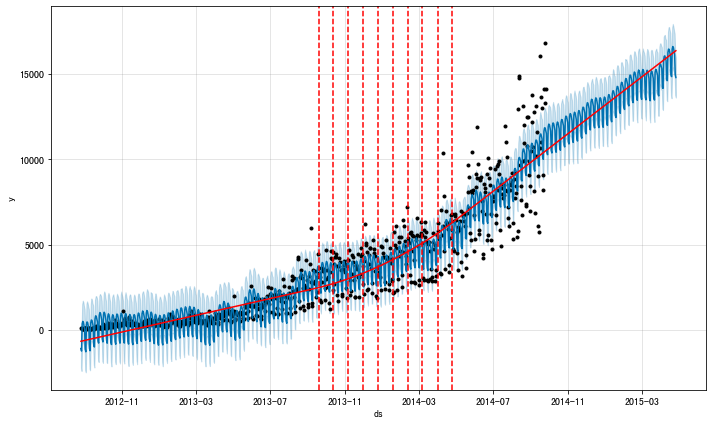

In [134]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
# 获取显著的突变点的位置
a = add_changepoints_to_plot(fig.gca(), model, forecast)
print(a)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


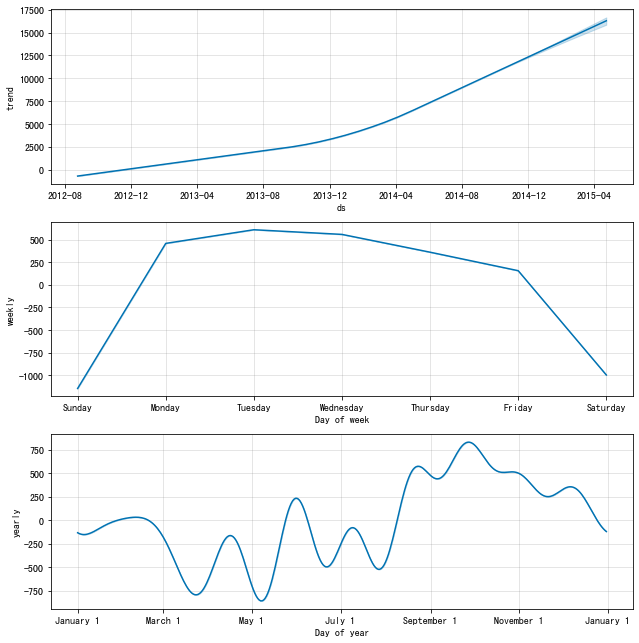

In [110]:
model.plot_components(forecast)
print(forecast.columns)

In [95]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast.csv')

In [82]:
data.head()

,ds,y
0,2012-08-25,76
1,2012-08-26,88
2,2012-08-27,62
3,2012-08-28,58
4,2012-08-29,60


In [97]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(210))

            ds          yhat    yhat_lower    yhat_upper
762 2014-09-26  11515.481432  10432.633235  12755.918101
763 2014-09-27  10395.408120   9231.571957  11560.912425
764 2014-09-28  10273.733722   9157.393993  11445.952964
765 2014-09-29  11899.286070  10705.679338  13148.741360
766 2014-09-30  12069.966474  10906.948066  13305.840105
..         ...           ...           ...           ...
967 2015-04-19  14857.072733  13607.355605  16107.029236
968 2015-04-20  16467.449591  15163.630798  17627.337344
969 2015-04-21  16620.402488  15268.691492  17928.156969
970 2015-04-22  16565.265665  15295.073213  17818.553890
971 2015-04-23  16359.775877  15107.970359  17589.441360

[210 rows x 4 columns]


In [146]:
daliy_data.head()

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60


In [172]:
daliy_data['year'] = daliy_data.ds.apply(lambda x:str(x)[:4])
daliy_data.sort_values(['year','y'],ascending=[1,0],inplace=True)
daliy_data.groupby(['year']).head(3)

,ds,y,year
Datetime,,,
2012-11-02,2012-11-02,1112,2012
2012-11-11,2012-11-11,758,2012
2012-11-05,2012-11-05,678,2012
2013-12-03,2013-12-03,6186,2013
2013-09-05,2013-09-05,5960,2013
2013-12-16,2013-12-16,5252,2013
2014-09-24,2014-09-24,16856,2014
2014-09-16,2014-09-16,16080,2014
2014-08-13,2014-08-13,14878,2014


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  holiday         ds  lower_window  upper_window
0    top3 2012-11-02             0             1
1    top3 2012-11-11             0             1
2    top3 2012-11-05             0             1
3    top3 2013-12-03             0             1
4    top3 2013-09-05             0             1
5    top3 2013-12-16             0             1
6    top3 2014-09-24             0             1
7    top3 2014-09-16             0             1
8    top3 2014-08-13             0             1
            ds         top3
465 2013-12-03  2657.422457
466 2013-12-04   828.504377
478 2013-12-16  2657.422457
479 2013-12-17   828.504377
718 2014-08-13  2657.422457
719 2014-08-14   828.504377
752 2014-09-16  2657.422457
753 2014-09-17   828.504377
760 2014-09-24  2657.422457
761 2014-09-25   828.504377
Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'holidays', 'holidays_lower', 'holidays_up

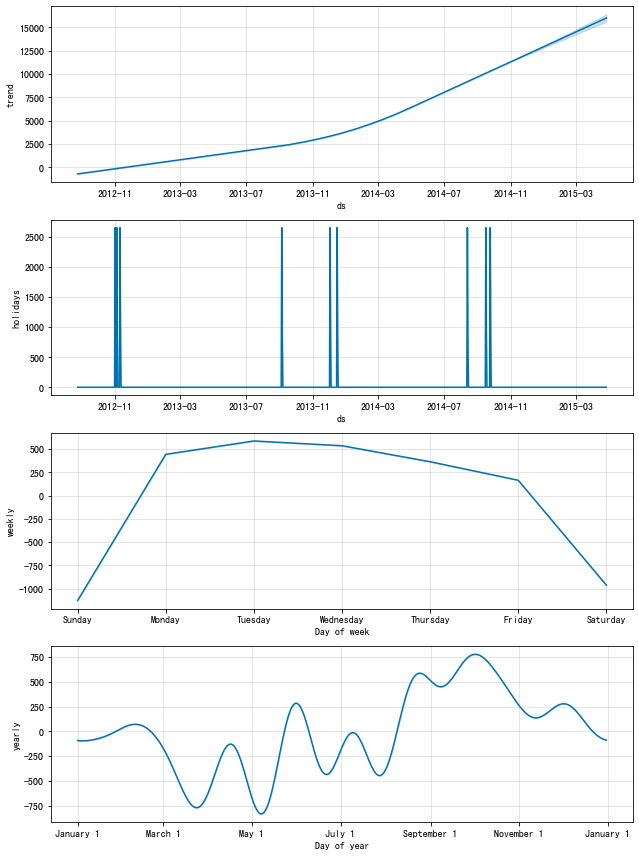

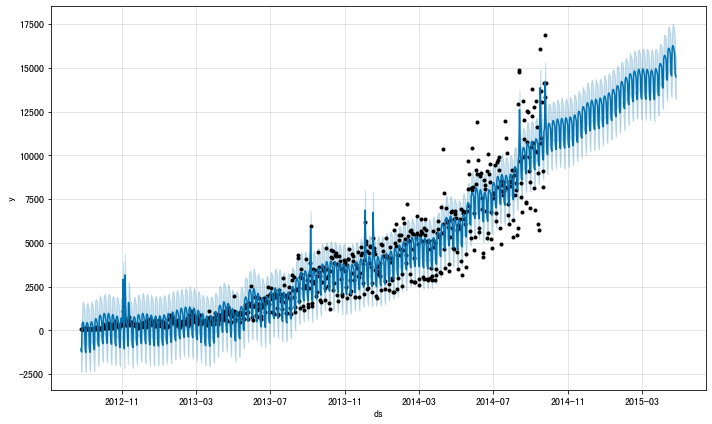

In [175]:
# 假设将每年的top3数据的日期作为history，带入模型中尝试
holidays = pd.DataFrame({
  'holiday': 'top3',
  'ds': pd.to_datetime(['2012-11-02', '2012-11-11', '2012-11-05','2013-12-03','2013-09-05','2013-12-16','2014-09-24','2014-09-16','2014-08-13']),
  'lower_window': 0,
  'upper_window': 1,
})
print(holidays)


# In[78]:

m = Prophet(holidays=holidays)
m.fit(daliy_data)
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)
#print(forecast.tail())
# 通过 forecast 数据框，展示节假日效应
print(forecast[forecast['top3'].abs() > 0][['ds', 'top3']][-10:])


# In[79]:


# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应,holidays项
m.plot_components(forecast)
print(forecast.columns)

# 展示预测结果
model.plot(forecast)
plt.show()

